# Bayesian sVAR Simulation for Microbiota and Metabolites

## Introduction to Sparse Vector Autoregressive (sVAR) Models

Sparse Vector Autoregressive (sVAR) models offer a robust framework for analyzing the dynamic interactions between different biological components over time. In the context of microbiota and metabolite analysis, sVAR models facilitate the study of causal relationships by allowing us to model the abundance of microbiota (X) and their produced metabolites (S) over time. This approach is particularly valuable for understanding how changes in microbiota composition can influence metabolite levels, and vice versa.

### sVAR Process

The sVAR model extends traditional VAR models by incorporating sparsity, allowing for a more nuanced representation of interactions where each microbe might only affect a small number of metabolites directly. The model can be represented as follows:

$$ X_t = A \cdot X_{t-1} + \epsilon_{X,t} $$
$$ S_t = B \cdot X_{t-1} + \epsilon_{S,t} $$

where:
- $X_t$ is the vector of microbiota abundances at time $t$,
- $S_t$ is the vector of metabolite abundances at time $t$,
- $A$ and $B$ are sparse matrices representing the interactions within microbiota and between microbiota and metabolites, respectively,
- $\epsilon_{X,t}$ and $\epsilon_{S,t}$ are vectors of error terms, assumed to be normally distributed with mean 0 and a specific standard deviation.

### Bayesian Approach

Our approach utilizes Bayesian methods to estimate the sparse interaction matrices, employing a constrained Horseshoe prior for sparsity. This allows us to directly infer the likely causal interactions from the data, providing a powerful tool for hypothesis generation and testing in complex biological systems.

### Objective

The objective of this notebook is to simulate and analyze the dynamics between microbiota and metabolites using a Bayesian sVAR model. Through simulation, we aim to demonstrate how specific interactions can be identified and quantified, providing insights into the causal relationships within these systems.

### Simulation with `VARsim.py` for sVAR Models

The `VARsim.py` script has been adapted to support sVAR simulation, allowing us to specify sparse interaction matrices and simulate the dynamics of microbiota and metabolites over time. This section demonstrates how to use the script for simulating and visualizing the interactions captured by our Bayesian sVAR model.


### Example Usage of `VARsim.py` for Bayesian sVAR Simulation

The implementation of the Bayesian sparse Vector Autoregressive (sVAR) model in `VARsim.py` allows for detailed simulation of the dynamic interactions between microbiota and their produced metabolites. Although the underlying Bayesian framework and the incorporation of sparsity add layers of complexity, the script is designed to facilitate straightforward simulation of these complex biological systems. By specifying sparse interaction matrices and employing a constrained Horseshoe prior for model sparsity, we can simulate and analyze the causal relationships within microbiota compositions and metabolites. The following code examples provide a guide on how to leverage the `VARsim.py` script to simulate these interactions effectively:


In [1]:
# Importing the libraries
from mimic.model_simulate.sim_VAR import *

First, let's first generate synthetic data for microbiota using the sim_VAR class. We will then simulate the sparse interaction with a given matrix

In [2]:
# Simulate a VAR model

simulator = sim_VAR()

simulator.print_parameters()

Model: VAR
{
    "n_obs": null,
    "coefficients": null,
    "initial_values": null,
    "noise_stddev": null,
    "output": null
}


We can now use the following parameters to generate the metabolic data:

```json
{
    "coefficientsM": [
        [
            0.0,
            -0.5,
            0.0
        ],
        [
            0.1,
            0.1,
            -0.1
        ],
        [
            -0.2,
            0.1,
            0.3
        ]
    ],
    "initial_valuesM": [
        [
            2
        ],
        [
            0
        ],
        [
            0
        ]
    ]
}

In [3]:
simulator.read_parameters(r'examples\examples-sim-VAR\parametersS.json')
simulator.print_parameters()

Model: VAR
{
    "n_obs": 97,
    "coefficients": [
        [
            0.8,
            -0.2,
            0.3
        ],
        [
            0.3,
            0.5,
            -1.0
        ],
        [
            0.2,
            -0.1,
            0.4
        ]
    ],
    "initial_values": [
        [
            1
        ],
        [
            2
        ],
        [
            0
        ]
    ],
    "noise_stddev": 1.2,
    "output": "show",
    "coefficientsM": [
        [
            0.0,
            -0.5,
            0.0
        ],
        [
            0.1,
            0.1,
            -0.1
        ],
        [
            -0.2,
            0.1,
            0.3
        ]
    ],
    "initial_valuesM": [
        [
            2
        ],
        [
            0
        ],
        [
            0
        ]
    ]
}


Using the following parameters for VAR simulation: {'n_obs': 97, 'coefficients': [[0.8, -0.2, 0.3], [0.3, 0.5, -1.0], [0.2, -0.1, 0.4]], 'initial_values': [[1], [2], [0]], 'noise_stddev': 1.2, 'output': 'show', 'coefficientsM': [[0.0, -0.5, 0.0], [0.1, 0.1, -0.1], [-0.2, 0.1, 0.3]], 'initial_valuesM': [[2], [0], [0]]}


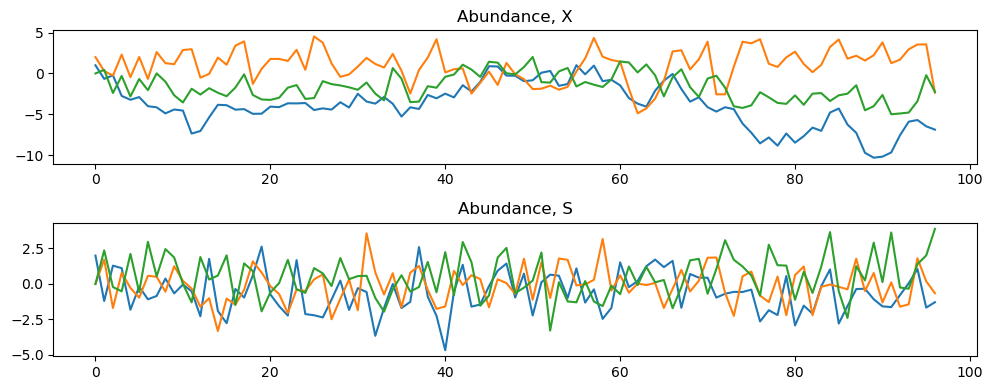

In [4]:
simulator.simulate('sVARsim')

### Visualization

To better understand the interactions and dynamics modeled by the sVAR process, we utilize specialized plotting functions within the `VARsim.py` script. These functions allow us to visualize the simulated time series data and the inferred interactions through heatmaps, providing valuable insights into the causal relationships within the system.

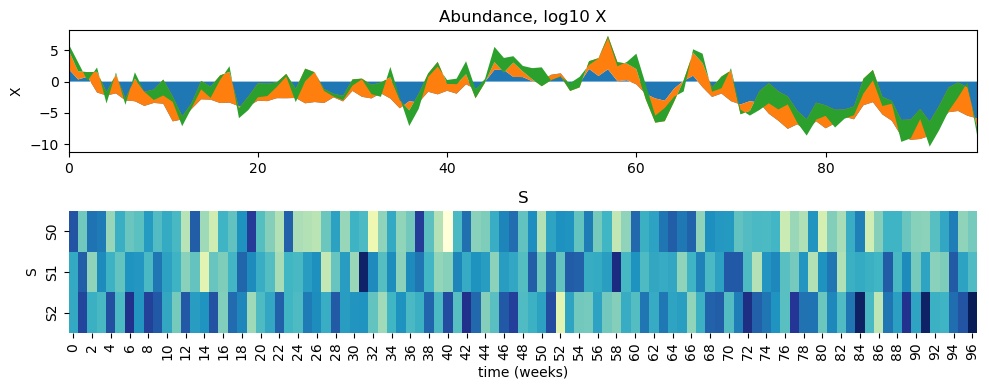

In [5]:
# Call the make_plot_stacked() method
simulator.make_plot_stacked(simulator.data, simulator.dataM)